In [4]:
library(boot)
library(stats)

## Confidence Intervals

You take a random sample of size n and calculate the sample mean. We use this sample mean as an *estimator* for the true population mean, also known as a "point estimate". A point estimate by itself is of limited usefulness because it does not reveal the uncertainty associated with the estimate or sampling method. Confidence intervals supply us with more information about the estimate by giving us an *interval*, with an associated *level of confidence*, that likely would contain the true population mean.  


* A confidence interval (CI) is an interval of values instead of a single point estimate.
* The level of confidence corresponds to the expected proportion of intervals that will contain the parameter if many confidence intervals are constructed of the same sample size from the same population. Another way of saying this is: 
    * 90% of confidence intervals computed at the 90% confidence level contain the true parameter
    * 95% of confidence intervals computed at the 95% confidence level contain the parameter
    * etc...
* Our uncertainty is about whether our particular CI is one of those that truly contains the true value of the parameter.
* Constructing confidence intervals requires knowledge about the sample distribution - sample mean and either population SD or sample SD. 
* Calculating CIs, theoretically, does not require that the population follow a normal distribution, however the math for such situations can get tricky. For this reason, if we know the population doesn't follow a normal, or we're just unsure, we can instead calculate an asymptotical CI on the *sample distribution for the sample mean* (according to the Central Limit Theorem, the sampling distribution for the sample mean approaches normal).  


General form:

sample statistic $\pm$ margin of error

margin of error $=$ multiplier(standard error)

From Lab 8, we learned standard error $= \frac{\hat\sigma}{\sqrt n}$. The multiplier is calculated using t-statistics from a t-distribution. (There's a lot of theory behind this, but in short - this distribution applies when a test statistic we're interested in would follow a normal distribution *if* the value of a scaling term in the test statistic were known. When it's unknown, the scaling term is replaced by an estimate based on the data (the SEM).) Other statistical methods can be used to calculate the multiplier, but the t-distribution is widely used for when we don't know the true population standar deviation (which we rarely do). 

### Example 
When the population follows a normal

In [2]:
# draw a random sample from the normal distribution
n <- 50
x <- rnorm(n, 0, 1) 
x

[1]  0.71228599 -1.18172790  0.82319907 -0.78884962  0.10926341  1.21944581
 [7] -2.09251758 -0.03273692  2.19288603 -0.72223920  1.55869919 -0.82851884
[13] -0.93830065  0.83787701 -0.63136259  0.04621284 -0.84200235 -1.60615464
[19]  0.32158743 -0.15340101 -1.26417464  1.43236515  0.31435961  0.39306371
[25] -0.35330509  0.01440350 -1.13185539 -0.24239954  1.37246403  0.39014585
[31] -1.01716955 -0.55688041  0.66911108 -0.28671906 -1.88554116  0.82720998
[37]  0.15812661  0.33705490  1.27834912 -0.29592304  0.61565683 -1.21090743
[43] -0.74333170 -0.72755561  0.56720284  1.04917426 -0.06678359  1.17701726
[49]  0.64779314 -0.74359211

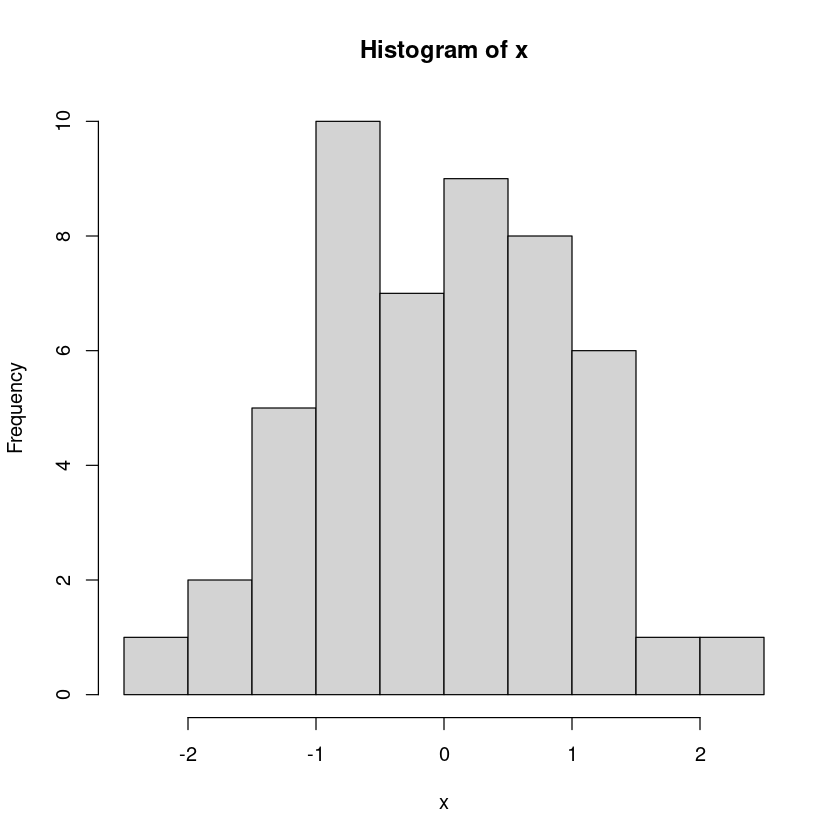

In [3]:
# histogram of the sample
hist(x)

In [4]:
# sample mean
mean <- mean(x)
mean

[1] -0.0255799

**Question - Is there evidence that our true population mean is different from our sample mean?**

In [5]:
# standard error of the mean
sem <- sd(x)/sqrt(n)
sem

[1] 0.1355044

In [6]:
# confidence interval with a confidence level of 95%
ci <- c(mean-qt(0.975, n-1)*sem, mean+qt(0.975, n-1)*sem)
ci

[1] -0.2978861  0.2467263

How do we interpret this? 

We are 95% confident that the true mean is within the above CI. Because the interval is centered around our sample mean, the answer to the above question is **no, there is no evidence that our true population mean is different from our sample mean**. 

---

**Hypothesis Testing**

In [7]:
# one-sample t-test
t.test(x)


	One Sample t-test

data:  x
t = -0.18878, df = 49, p-value = 0.851
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2978861  0.2467263
sample estimates:
 mean of x 
-0.0255799 


In [8]:
# two-sample t-test
# draw a random sample from the normal distribution
n <- 50
y <- rnorm(n, 0, 1) 
print(mean(y))
t.test(x, y)


[1] -0.003502897



	Welch Two Sample t-test

data:  x and y
t = -0.11789, df = 97.783, p-value = 0.9064
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3937152  0.3495612
sample estimates:
   mean of x    mean of y 
-0.025579900 -0.003502897 


---
As mentioned, if the population doesn't follow a normal distribution, or we're unsure, we can construct a CI on the sampling distribution of the sample mean. However, collecting multiple samples, from which we can calculate sample means, is not always feasible. This is where bootstrapping comes in handy.

## Bootstrapping

How it works:

Bootstrapping resamples the original dataset with replacement many thousands of times to create simulated datasets. This process involves drawing random samples from the original dataset. Breaking it down:

* The bootstrap method has an equal probability of randomly drawing each original data point for inclusion in the resampled datasets.
* The procedure can select a data point more than once for a resampled dataset. This property is the “with replacement” aspect of the process.
* The procedure creates resampled datasets that are the same size as the original dataset.

The process ends with your simulated datasets having many different combinations of the values that exist in the original dataset. Each simulated dataset has its own set of sample statistics, such as the mean. Bootstrapping procedures use the distribution of the sample statistics across the simulated samples as the sampling distribution.

Keep in mind that bootstrapping does not create new data. Instead, it treats the original sample as a proxy for the real population and then draws random samples from it. Consequently, the central assumption for bootstrapping is that the original sample accurately represents the actual population. The resampling process creates many possible samples that a study could have drawn. The various combinations of values in the simulated samples collectively provide an estimate of the variability between random samples drawn from the same population. The range of these potential samples allows the procedure to construct confidence intervals and perform hypothesis testing. Importantly, as the sample size increases, bootstrapping converges on the correct sampling distribution under most conditions.

### Example 
When the population doesn't follow a normal (or we're uncertain).

#### Manual bootstrapping:

In [29]:
# sample data for duck plumage - each row represents a male duck who is a second generation cross of 
# mallard and pintail ducks. Plumage indices were calculates for each duck - ranged from 0 (identical in appearance
# to a mallard) to 20 (identical to a pintail). 

data <- data.frame(weight = c(catsM$Bwt))
n <- length(data$weight)
data

weight
<dbl>
2.0
2.0
2.1
2.2
2.2
2.2
2.2
2.2
2.2


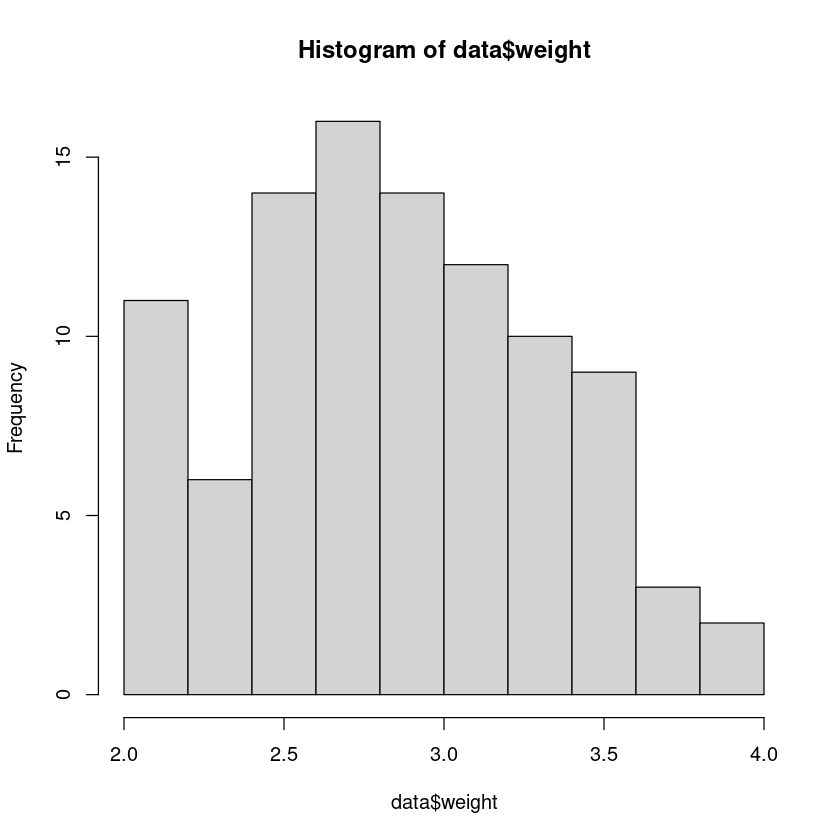

In [30]:
# histogram of duck plumage indices
hist(data$weight, breaks=10)

In [31]:
# mean of duck plumage indices
mean <- mean(data$weight)
mean

[1] 2.9

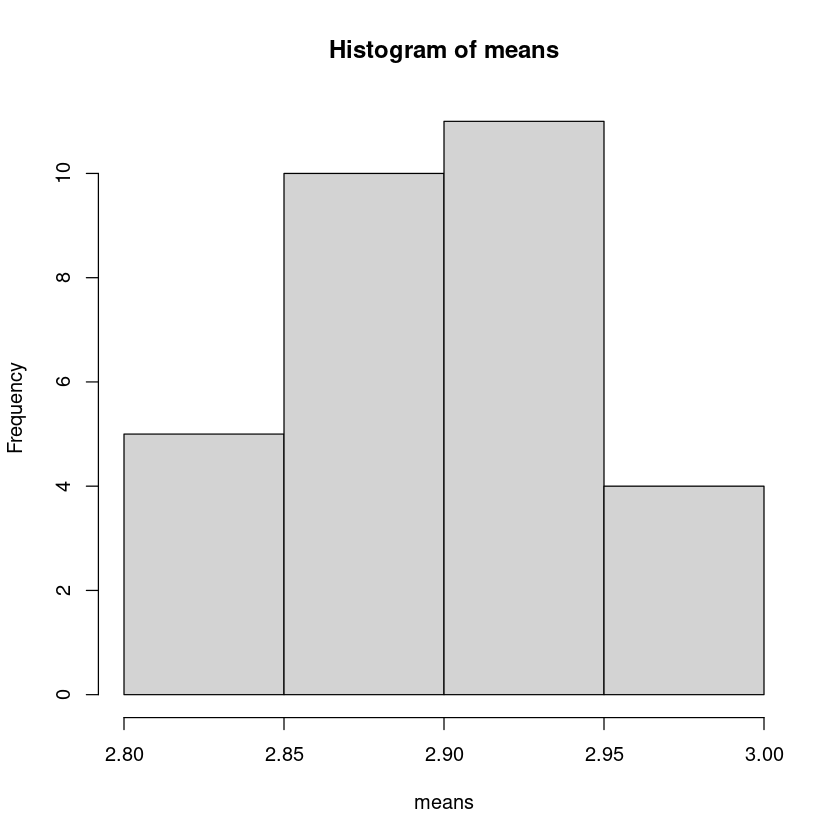

In [32]:
# create 30 bootstrap samples and calculate their sample means
bootReps <- 30
means <- c()
for(i in 1:bootReps){
    sample <- sample(data$weight, size = n, replace = T)
    means <- append(means, mean(sample))
}
hist(means)

In [33]:
# construct the CI for the above sampling distribution of sample means
meanOfMeans <- mean(means)
semOfMeans <- sd(means)/sqrt(bootReps)
ciOfMeans <- c(meanOfMeans-qt(0.975,bootReps-1)*semOfMeans, meanOfMeans+qt(0.975,bootReps-1)*semOfMeans)
ciOfMeans

[1] 2.881931 2.914907

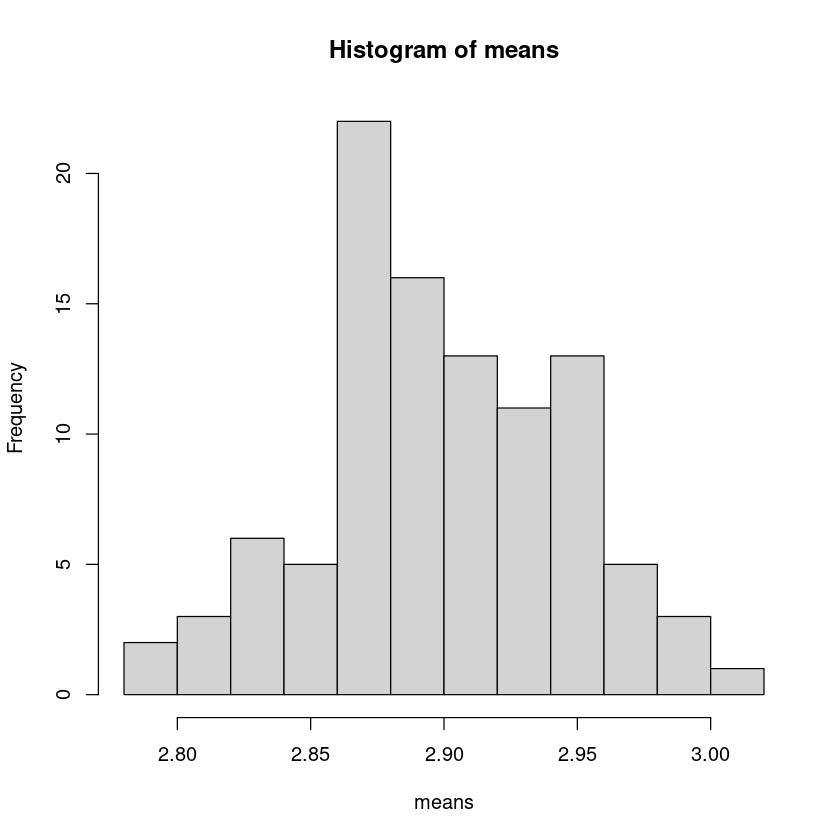

In [34]:
# create 100 bootstrap samples and calculate their sample means
bootReps <- 100
means <- c()
for(i in 1:bootReps){
    sample <- sample(data$weight, size = n, replace = T)
    means <- append(means, mean(sample))
}
hist(means)

In [35]:
# construct the CI for the above sampling distribution of sample means
meanOfMeans <- mean(means)
semOfMeans <- sd(means)/sqrt(bootReps)
ciOfMeans <- c(meanOfMeans-qt(0.975,bootReps-1)*semOfMeans, meanOfMeans+qt(0.975,bootReps-1)*semOfMeans)
ciOfMeans

[1] 2.889604 2.907860

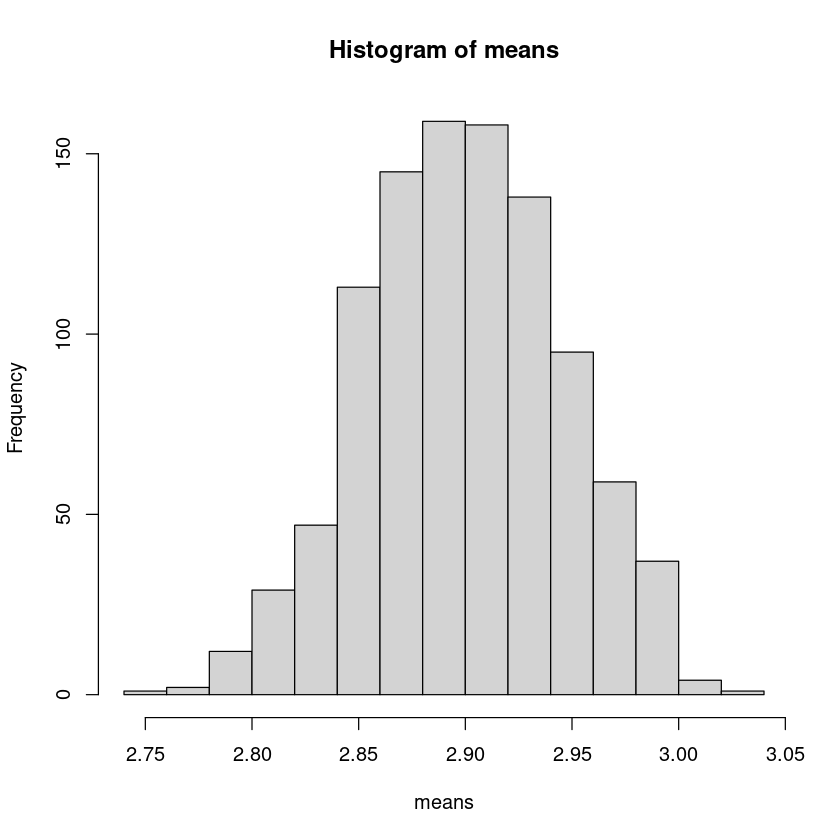

In [36]:
# create 1000 bootstrap samples and calculate their sample means
bootReps <- 1000
means <- c()
for(i in 1:bootReps){
    sample <- sample(data$weight, size = n, replace = T)
    means <- append(means, mean(sample))
}
hist(means)

In [37]:
# construct the CI for the above sampling distribution of sample means
meanOfMeans <- mean(means)
semOfMeans <- sd(means)/sqrt(bootReps)
ciOfMeans <- c(meanOfMeans-qt(0.975,bootReps-1)*semOfMeans, meanOfMeans+qt(0.975,bootReps-1)*semOfMeans)
ciOfMeans

[1] 2.896371 2.902088

Notice how the sampling distribution in the histogram approximates a normal distribution even though the underlying data distribution is not. This approximation occurs thanks to the central limit theorem. As the sample size increases, the sampling distribution converges on a normal distribution regardless of the underlying data distribution (with a few exceptions).

We can compare our original sample mean to the context of our simulated sample distribution.

#### Using `boot()`:

`boot()` calls the statistic function R times. Each time, it generates a set of random indices, with replacement, from the integers `1:nrow(data)`. These indices are used within the statistic function to select a sample. The statistics are calculated on the sample and the results are accumulated in the bootobject. 

**Note:** The function should include an indices parameter that the `boot()` function can use to select cases for each replication. Refer to example.

In [18]:
?boot

In [38]:
# create the `statistic` function for the mean
mean_fun <- function(data,index){
  return(mean(data[index,]))
}

In [39]:
# run a bootstrap analysis for 30 replicates
res <- boot(data = data, R=30, statistic = mean_fun)
res


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = mean_fun, R = 30)


Bootstrap Statistics :
    original       bias    std. error
t1*      2.9 -0.003402062  0.05684025

In [40]:
res$t

2.877320
2.984536
2.915464
2.929897
2.934021
2.895876
2.851546
2.731959
2.934021
2.955670
2.841237


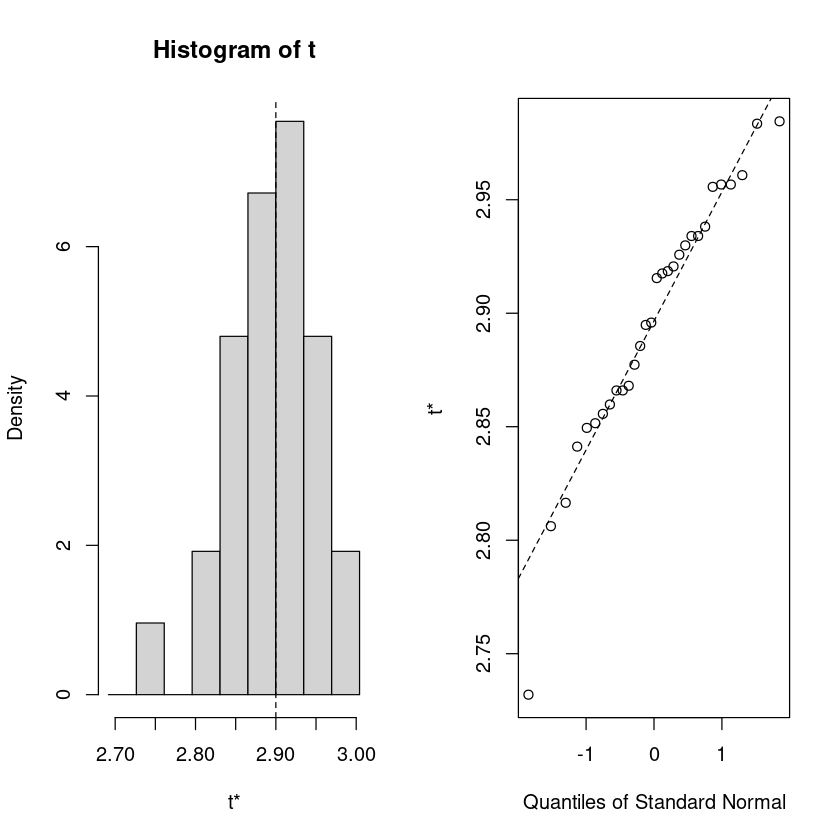

In [41]:
plot(res)

In [42]:
boot.ci(res, conf = 0.95, type = "norm")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 30 bootstrap replicates

CALL : 
boot.ci(boot.out = res, conf = 0.95, type = "norm")

Intervals : 
Level      Normal        
95%   ( 2.792,  3.015 )  
Calculations and Intervals on Original Scale

In [43]:
# run a bootstrap analysis for 100 replicates
res <- boot(data = data, R=100, statistic = mean_fun)
res


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = mean_fun, R = 100)


Bootstrap Statistics :
    original       bias    std. error
t1*      2.9 -0.000814433  0.04467842

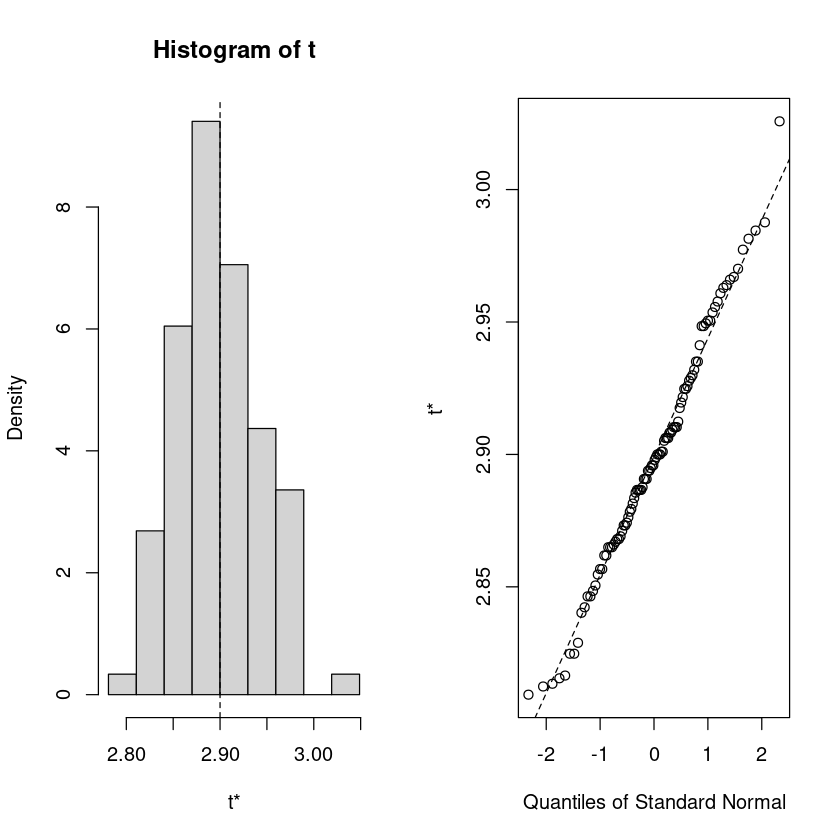

In [44]:
plot(res)

In [45]:
boot.ci(res, conf = 0.95, type = "norm")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 100 bootstrap replicates

CALL : 
boot.ci(boot.out = res, conf = 0.95, type = "norm")

Intervals : 
Level      Normal        
95%   ( 2.813,  2.988 )  
Calculations and Intervals on Original Scale

In [46]:
# run a bootstrap analysis for 1000 replicates
res <- boot(data = data, R=1000, statistic = mean_fun)
res


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = mean_fun, R = 1000)


Bootstrap Statistics :
    original        bias    std. error
t1*      2.9 -4.123711e-05  0.04712429

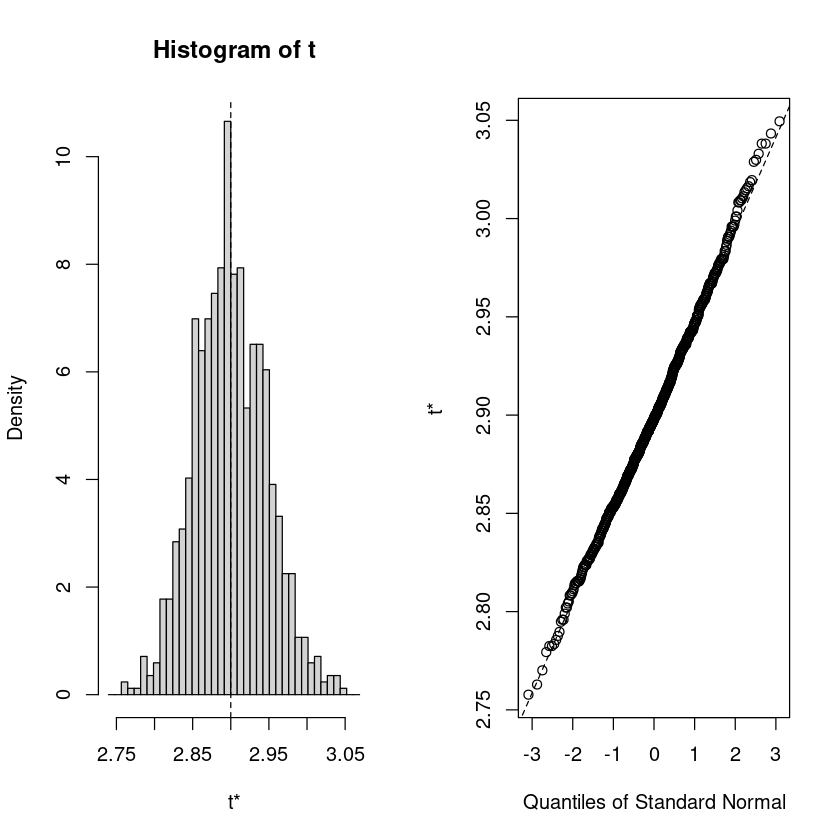

In [47]:
plot(res)

In [48]:
boot.ci(res, conf = 0.95, type = "norm")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = res, conf = 0.95, type = "norm")

Intervals : 
Level      Normal        
95%   ( 2.808,  2.992 )  
Calculations and Intervals on Original Scale

In [50]:
mean <- mean(res$t)
sem <- sd(res$t)/sqrt(1000)
ci <- c(mean - qt(0.975, 999)*sem, mean + qt(0.975, 999)*sem)
ci

[1] 2.897034 2.902883

In [55]:
# is there a statistically significant difference in weights between male and female cats?
library(MASS)
t.test(Bwt ~ Sex, data = cats)


	Welch Two Sample t-test

data:  Bwt by Sex
t = -8.7095, df = 136.84, p-value = 8.831e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6631268 -0.4177242
sample estimates:
mean in group F mean in group M 
       2.359574        2.900000 
